In [11]:
# import libraries

#Pandas is a Python library for data analysis. Started by Wes McKinney in 2008 out of a need for a powerful and flexible quantitative analysis tool, pandas has grown into one of the most popular Python libraries. It has an extremely active community of contributors.
import pandas as pd
import seaborn as sns
import numpy as np

# Seaborn vs matplotlib is that seaborn utilises fascinating themes, while matplotlib used for making basic graphs. Seaborn contains a few plots and patterns for data visualisation, while in matplotlib, datasets are visualised with the assistance of lines, scatter plots, pie charts, histograms, bar-graphs, etc
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'D:\Shub\PortfolioProject\Untitled Folder\movies.csv')



In [7]:
#Lets look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# Updating data with the video based on comments
'''Hello! The dataset appears to be updated on Kaggle and for anyone new, you will run into some issues that you need to fix to follow along.

1. Missing data. There are missing values opposed to this video so you will need to fix that. There are many ways to handle missing values but for the sake of time, I decided to drop all rows that have missing data. You will have about 71% of your data remaining. You will need to run the following if your dataframe is named df.

df = df.dropna()

2. Extracting the year is different as the formatting is different. Running the following should extract the correct year.

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

3. Duplicates, there aren't any in this dataset so you should be fine on that. 

I hope this helps anyone that is working on this and best of luck on your analytics journey!'''

"Hello! The dataset appears to be updated on Kaggle and for anyone new, you will run into some issues that you need to fix to follow along.\n\n1. Missing data. There are missing values opposed to this video so you will need to fix that. There are many ways to handle missing values but for the sake of time, I decided to drop all rows that have missing data. You will have about 71% of your data remaining. You will need to run the following if your dataframe is named df.\n\ndf = df.dropna()\n\n2. Extracting the year is different as the formatting is different. Running the following should extract the correct year.\n\ndf['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)\n\n3. Duplicates, there aren't any in this dataset so you should be fine on that. \n\nI hope this helps anyone that is working on this and best of luck on your analytics journey!"

In [9]:
df = df.dropna()

In [42]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [38]:
# Look for missing data
df = df.dropna()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [13]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
for col in df.columns:
   print('{}--{}'.format(col,df[col].isnull()))
   

name--0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: name, Length: 7668, dtype: bool
rating--0       False
1       False
2       False
3       False
4       False
        ...  
7663     True
7664     True
7665     True
7666     True
7667     True
Name: rating, Length: 7668, dtype: bool
genre--0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: genre, Length: 7668, dtype: bool
year--0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: year, Length: 7668, dtype: bool
released--0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: released, Length: 7668, dtype: b

In [18]:
# Data types for our column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [41]:
# Change data type to int to remove decimal
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [35]:
count = 0;
for x in df['budget']:
    print(x)
    if x == 'nan':
        count +=1
print(count)

19000000.0
4500000.0
18000000.0
3500000.0
6000000.0
550000.0
27000000.0
18000000.0
54000000.0
10000000.0
15000000.0
5000000.0
20000000.0
6000000.0
6500000.0
5100000.0
nan
10000000.0
1000000.0
nan
11000000.0
44000000.0
12000000.0
20000000.0
nan
nan
nan
36000000.0
9000000.0
4800000.0
nan
nan
nan
5100000.0
nan
10000000.0
4000000.0
3000000.0
nan
nan
nan
nan
3500000.0
nan
nan
nan
22000000.0
300000.0
15000000.0
35000000.0
10000000.0
7000000.0
20000000.0
6500000.0
nan
nan
20000000.0
6000000.0
4000000.0
11000000.0
nan
nan
nan
nan
nan
nan
900000.0
nan
nan
nan
nan
nan
nan
nan
nan
6000000.0
nan
5500000.0
nan
3000000.0
5100000.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
18000000.0
nan
10000000.0
6000000.0
350000.0
2500000.0
18000000.0
15000000.0
11000000.0
3000000.0
nan
10000000.0
nan
18000000.0
5500000.0
nan
5000000.0
nan
1250000.0
nan
28000000.0
2500000.0
14000000.0
32000000.0
nan
12000000.0
5500000.0
12000000.0
6500000.0
10000000.0
7000000.0
nan
nan
3000000.0
11000000.0
1000000.0
18000000.0
3

In [39]:
#Print null valuea
for col in df.columns:
    df = df.dropna()
    print(df[col].isnull().value_counts(), "\n")

False    5421
Name: name, dtype: int64 

False    5421
Name: rating, dtype: int64 

False    5421
Name: genre, dtype: int64 

False    5421
Name: year, dtype: int64 

False    5421
Name: released, dtype: int64 

False    5421
Name: score, dtype: int64 

False    5421
Name: votes, dtype: int64 

False    5421
Name: director, dtype: int64 

False    5421
Name: writer, dtype: int64 

False    5421
Name: star, dtype: int64 

False    5421
Name: country, dtype: int64 

False    5421
Name: budget, dtype: int64 

False    5421
Name: gross, dtype: int64 

False    5421
Name: company, dtype: int64 

False    5421
Name: runtime, dtype: int64 



In [44]:
#Create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

In [45]:
df['yearcorrect']

0       June
1       July
2       June
3       July
4       July
        ... 
7648    Janu
7649    Febr
7650    Janu
7651    Febr
7652    Augu
Name: yearcorrect, Length: 5421, dtype: object

In [54]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')[source]
Sort by the values along either axis

Parameters:	
by : str or list of str

Name or list of names to sort by.

if axis is 0 or ‘index’ then by may contain index levels and/or column labels
if axis is 1 or ‘columns’ then by may contain column levels and/or index labels
Changed in version 0.23.0: Allow specifying index or column level names.

axis : {0 or ‘index’, 1 or ‘columns’}, default 0

Axis to be sorted

ascending : bool or list of bool, default True

Sort ascending vs. descending. Specify list for multiple sort orders. If this is a list of bools, must match the length of the by.

inplace : bool, default False

if True, perform operation in-place

kind : {‘quicksort’, ‘mergesort’, ‘heapsort’}, default ‘quicksort’

Choice of sorting algorithm. See also ndarray.np.sort for more information. mergesort is the only stable algorithm. For DataFrames, this option is only applied when sorting on a single column or label.

na_position : {‘first’, ‘last’}, default ‘last’

first puts NaNs at the beginning, last puts NaNs at the end

Returns:	
sorted_obj : DataFrame

In [47]:
# Look at all of the data

pd.set_option('display.max_rows',None)

In [48]:
# Show distinct values
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [50]:
# Drop any duplicates
# just save the statement in column itself

df['company'] = df['company'].drop_duplicates().sort_values(ascending=False)


In [51]:
#CORRELATION

# Budget high correlation
# Company high correlation


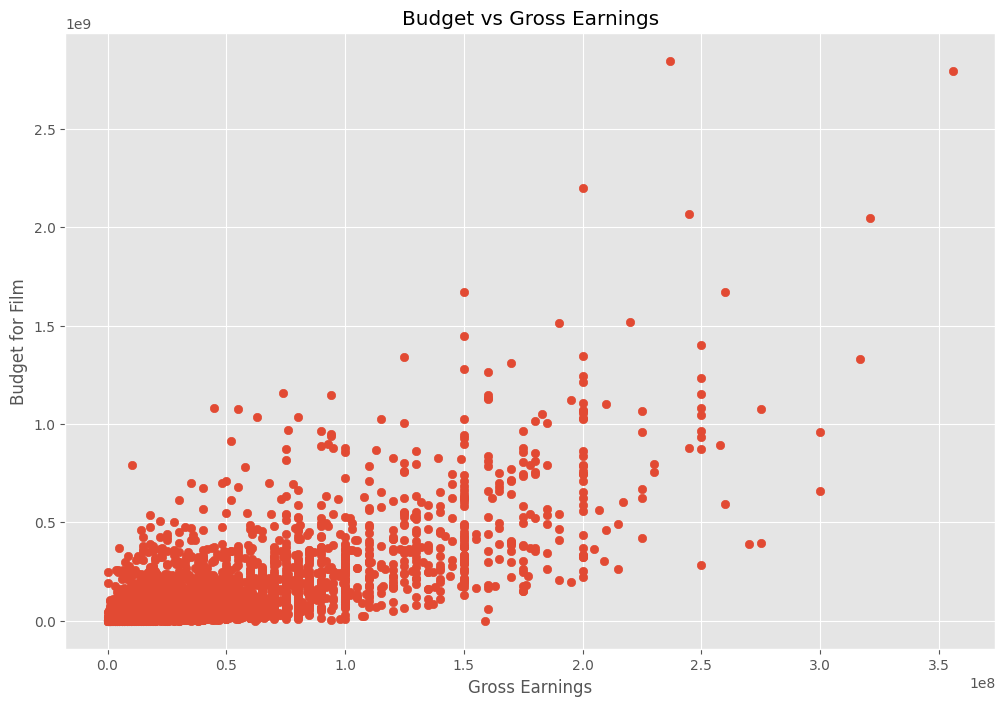

In [56]:
# Scatter plot with bidget vs gross revenue

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot: xlabel='budget', ylabel='gross'>

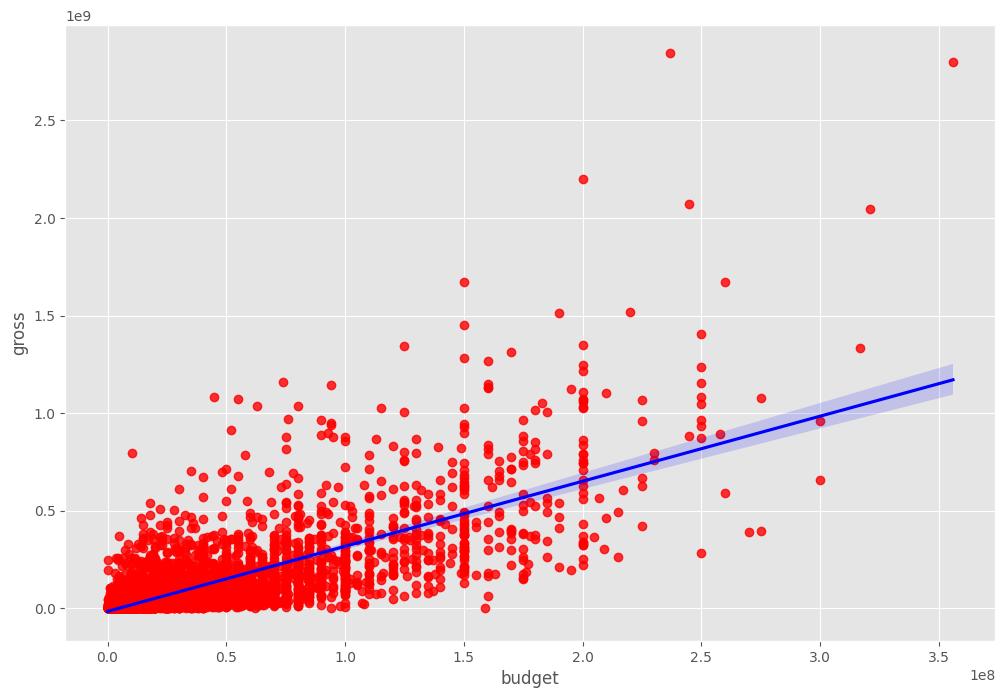

In [58]:
# Plot budget vs gross using seaborn
#Plotting a regression graph

sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [59]:
# CORRELATIONS IN OUR DATA (Only workds on numerical field)

df.corr()

C:\Users\gshar\AppData\Local\Temp\ipykernel_20744\1851783403.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [60]:
df.corr('pearson')#pearson, kendall, spearman

C:\Users\gshar\AppData\Local\Temp\ipykernel_20744\470851581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr('pearson')#pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


C:\Users\gshar\AppData\Local\Temp\ipykernel_20744\960147834.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


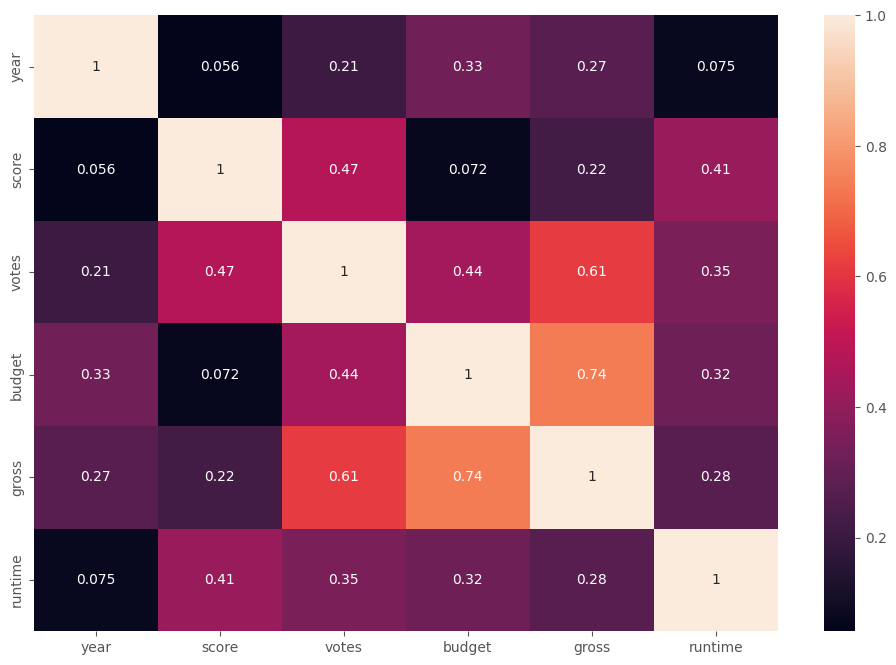

In [62]:
correlation_matrix = df.corr(method='pearson')

#Heat map of correlation
sns.heatmap(correlation_matrix, annot=True)

plt.show()

C:\Users\gshar\AppData\Local\Temp\ipykernel_20744\220490676.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='spearman')


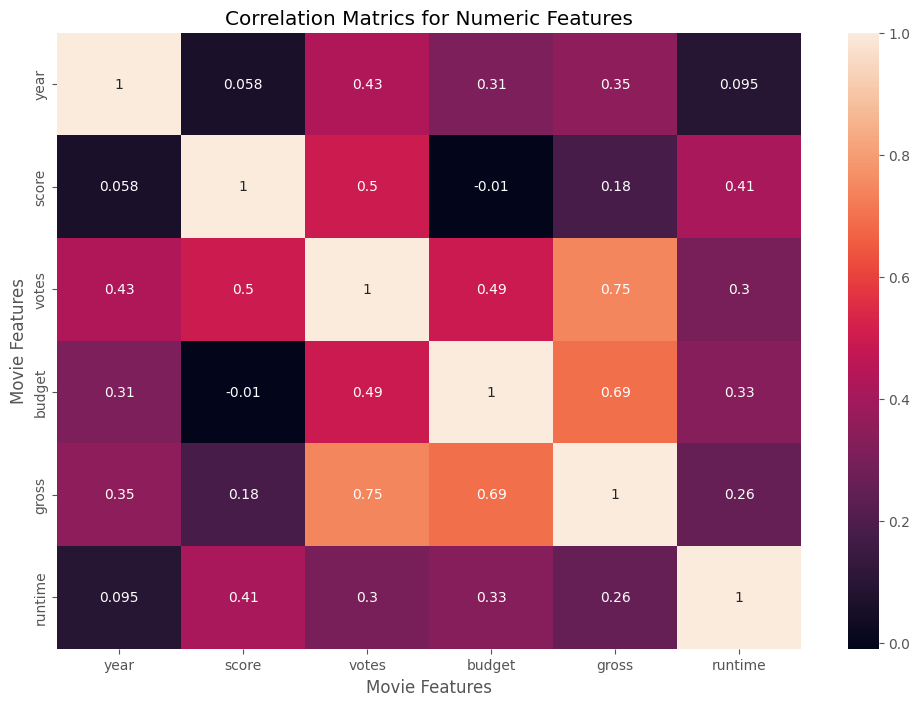

In [65]:
correlation_matrix = df.corr(method='spearman')

#Heat map of correlation
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrics for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
Pandas dtype	Python type	NumPy type	Usage
object	str or mixed	string_, unicode_, mixed types	Text or mixed numeric and non-numeric values
int64	int	int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64	Integer numbers
float64	float	float_, float16, float32, float64	Floating point numbers
bool	bool	bool_	True/False values
datetime64	NA	datetime64[ns]	Date and time values
timedelta[ns]	NA	NA	Differences between two datetimes
category	NA	NA	Finite list of text values

In [68]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [76]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,-1,162.0,7
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,-1,181.0,5
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,-1,194.0,7
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,-1,138.0,7
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,-1,149.0,5


In [77]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,-1,162.0,7
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,-1,181.0,5
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,-1,194.0,7
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,-1,138.0,7
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,-1,149.0,5


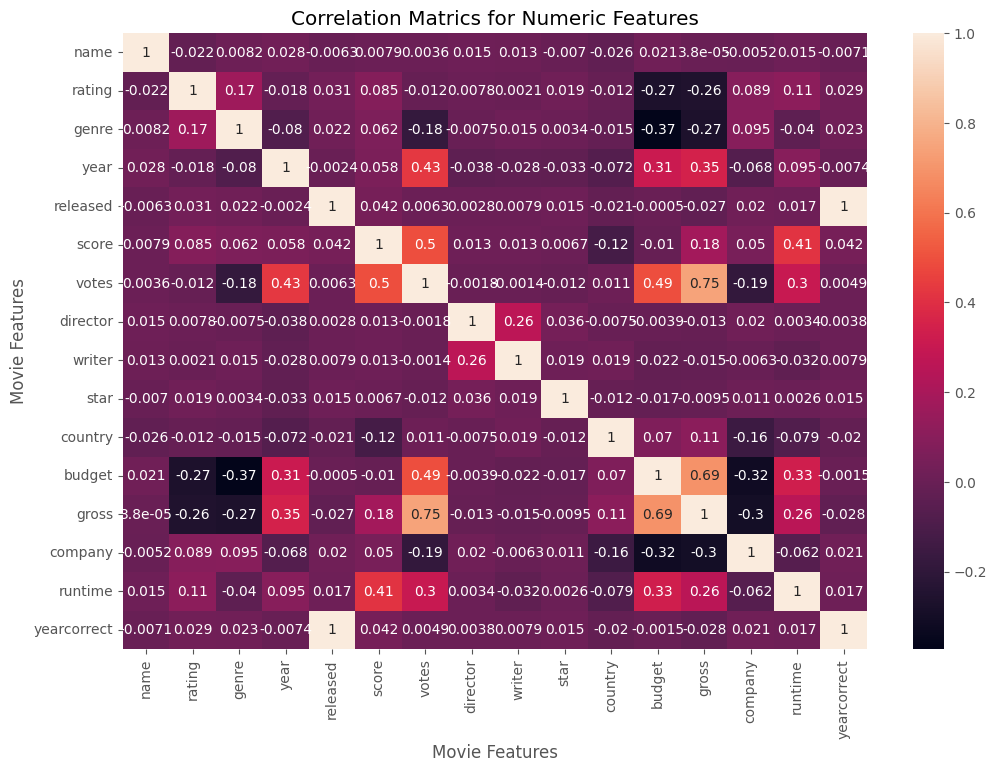

In [71]:
correlation_matrix = df.corr(method='spearman')

#Heat map of correlation
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrics for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [72]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.011370,0.010850,-0.007371
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,0.040181,0.140792,0.015532
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,0.076747,-0.059237,0.021306
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.068506,0.075077,-0.005073
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,0.029257,0.008975,0.996181
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.048362,0.414068,0.045136
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,-0.099914,0.352303,0.027535
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,0.016889,0.017433,0.003497
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.005739,-0.017561,0.007594
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.017474,0.010108,0.014919


In [73]:
#Unstacking, better view for correlation as per each column

correlation_mat = df.corr()
corr_pair = correlation_mat.unstack()

corr_pair

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.011370
             runtime        0.010850
             yearcorrect   -0.007371
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [74]:
#MAtrix in a linear way

sorted_pairs = corr_pair.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
budget       rating        -0.203946
rating       budget        -0.203946
company      budget        -0.197893
budget       company       -0.197893
gross        rating        -0.181906
rating       gross         -0.181906
company      gross         -0.147686
gross        company       -0.147686
votes        genre         -0.135990
genre        votes         -0.135990
country      company       -0.114793
company      country       -0.114793
votes        company       -0.099914
company      votes         -0.099914
year         genre         -0.073167
genre        year          -0.073167
company      year          -0.068506
year         company       -0.068506
country      year          -0.066748
year         country       -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
s

In [75]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
released     yearcorrect    0.996181
yearcorrect  released       0.996181
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation